In [1]:
import numpy as np

from pulse2percept import electrode2currentmap as e2cm
from pulse2percept import effectivecurrent2brightness as ec2b

import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
retina = e2cm.Retina(sampling=50, xlo=-1000, xhi=1000, ylo=-1000, yhi=1000)

File '../retina_s50_l2.0_rot0.0_2000x2000.npz' doesn't exist or has outdated parameter values, generating...


In [52]:
implant = e2cm.ElectrodeArray('epiretinal', [100, 100], [-400, 400], [0, 0], [0, 0])

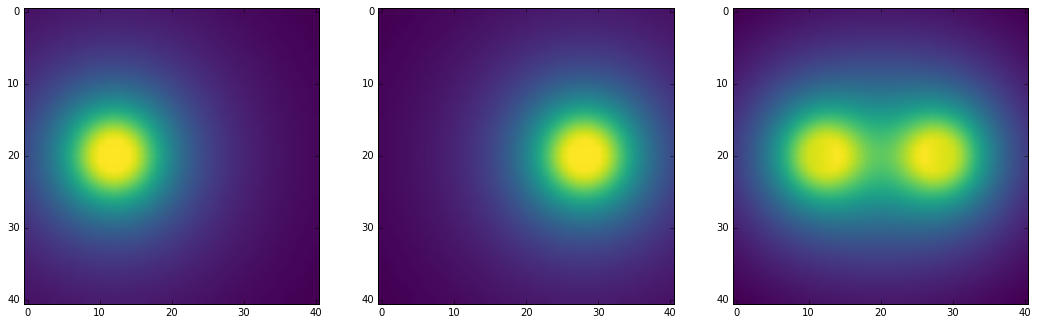

In [53]:
plt.figure(figsize=(18, 6))
summed = np.zeros(retina.gridx.shape)
for j in range(implant.num_electrodes):
    plt.subplot(1, implant.num_electrodes + 1, j + 1)
    cs = implant[j].current_spread(retina.gridx, retina.gridy, 'NFL')
    summed += cs
    plt.imshow(cs, cmap='viridis')
plt.subplot(1, implant.num_electrodes + 1, implant.num_electrodes + 1)
plt.imshow(summed, cmap='viridis')

(0, 2)

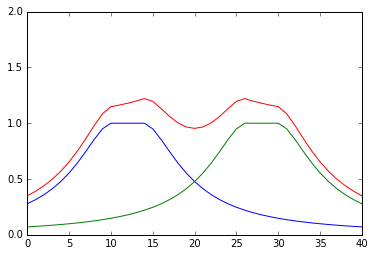

In [54]:
summed = np.zeros(retina.gridx.shape[0])
for j in range(implant.num_electrodes):
    cs = implant[j].current_spread(np.unique(retina.gridx), 0, 'NFL').flatten()
    summed += cs
    plt.plot(cs)

plt.plot(summed)
plt.ylim(0, 2)

In [ ]:
fr = implant[0].current_spread(np.unique(retina.gridx), 0, 'NFL').flatten()


In [3]:
tsample = 5e-6
tm = ec2b.TemporalModel(tsample, shift=15)

In [4]:
height = 10 ** np.linspace(0, 3, 10)

In [5]:
bright = []
for h in height:
    implant = e2cm.ElectrodeArray('epiretinal', 260, 0, 0, hs=h)
    pt = e2cm.Psycho2Pulsetrain(freq=10, amp=20, dur=0.5, tsample=tsample,
                                pulse_dur=0.975 / 1000, interphase_dur=0.975 / 1000)
    resp = ec2b.pulse2percept(pt, implant, tm, retina, use_ecs=False, n_jobs=8, dojit=True, tol=0.01)
    bright.append(resp.data.max())
    print((h, resp.data.max()))

(1.0, 15.881346401545684)
(2.1544346900318838, 15.876509460653427)
(4.6415888336127784, 15.858806038750775)
(10.0, 15.793952046280822)
(21.544346900318832, 15.555675880231323)
(46.415888336127772, 14.675402581620622)
(100.0, 11.543909880789853)
(215.44346900318823, 4.620475392416993)
(464.15888336127773, 0.86903876948134573)
(1000.0, 0.27330367940138134)


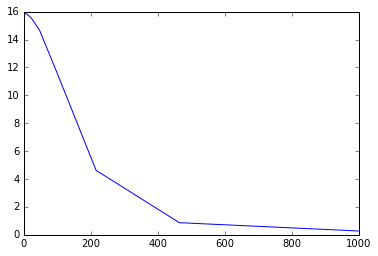

In [8]:
plt.plot(height, bright)